# Problem statement
## Consider only the below columns and prepare a prediction model for predicting Price.

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
f=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (1).csv


In [ ]:
toyota=pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
toyota.shape

(1436, 38)

In [ ]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [ ]:
data=pd.DataFrame({'Price':toyota.Price,'Age':toyota.Age_08_04,'KM':toyota.KM,'HP':toyota.HP,'cc':toyota.cc,'Doors':toyota.Doors,'Gears':toyota.Gears,'Qtax':toyota.Quarterly_Tax,'Weight':toyota.Weight})

In [ ]:
data

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## EDA

In [ ]:
data.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
cc        int64
Doors     int64
Gears     int64
Qtax      int64
Weight    int64
dtype: object

In [ ]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Qtax      0
Weight    0
dtype: int64

In [ ]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1435, 9)

In [ ]:
data[data.index==113]

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data[data.index==113]

,index,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight
113,114,22950,7,10000,116,2000,5,5,234,1270


In [ ]:
data

,index,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
data.drop('index',axis=1,inplace=True)

In [ ]:
data

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
data.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Detecting the outliers and transforming the data

Text(0.5, 1.0, 'Price')

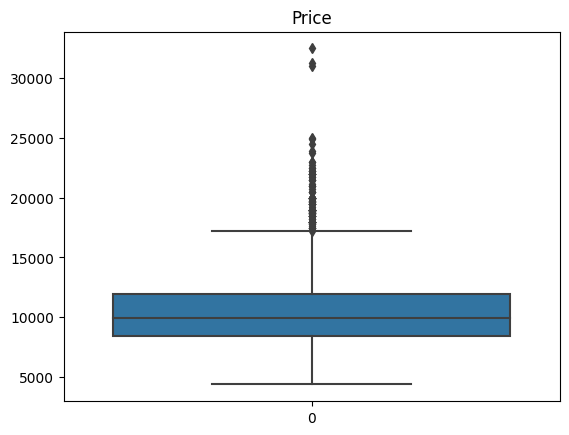

In [ ]:
sns.boxplot(data.Price)
plt.title('Price')

Text(0.5, 1.0, 'Price after transformation')

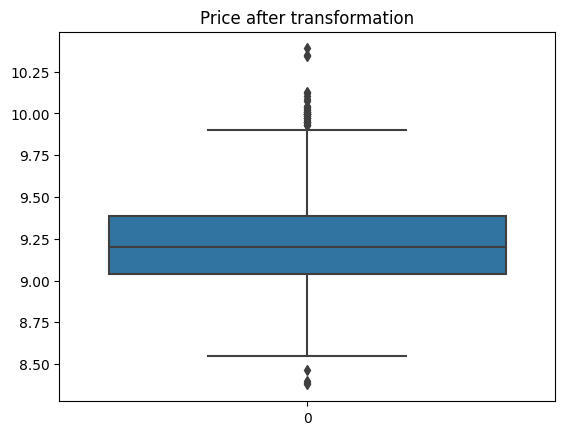

In [ ]:
sns.boxplot(np.log(data.Price))
plt.title('Price after transformation')

Text(0.5, 1.0, 'Price after transformation')

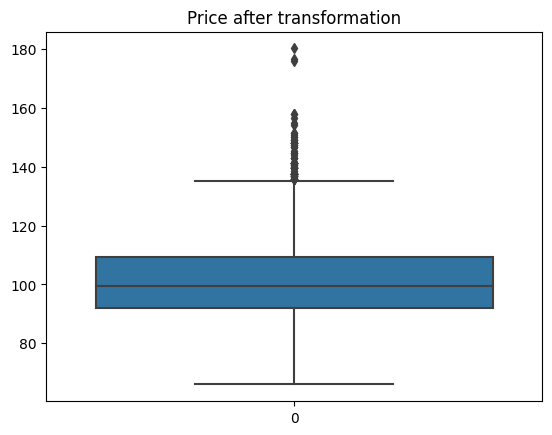

In [ ]:
sns.boxplot(np.sqrt(data.Price))
plt.title('Price after transformation')

Text(0.5, 1.0, 'Age')

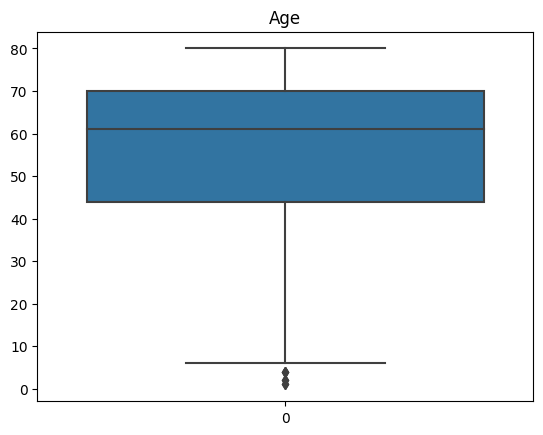

In [ ]:
sns.boxplot(data.Age)
plt.title('Age')

Text(0.5, 1.0, 'Age after transformation')

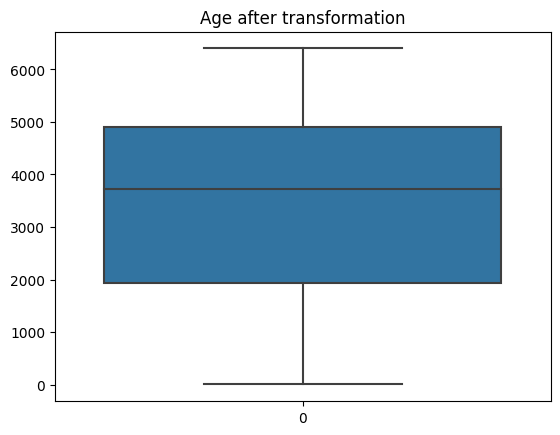

In [ ]:
sns.boxplot(np.square(data.Age))
plt.title('Age after transformation')

Text(0.5, 1.0, 'KM')

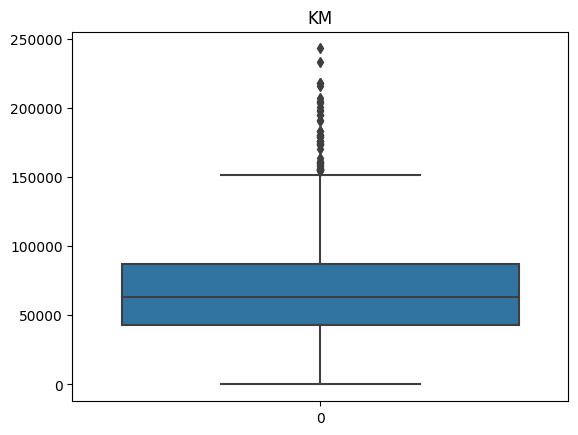

In [ ]:
sns.boxplot(data.KM)
plt.title('KM')

Text(0.5, 1.0, 'KM after log transformation')

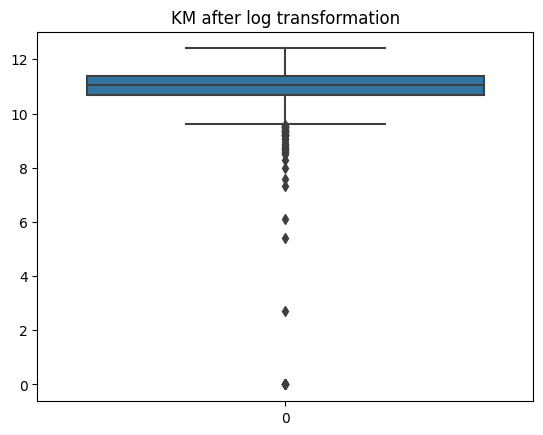

In [ ]:
sns.boxplot(np.log(data.KM))
plt.title('KM after log transformation')

Text(0.5, 1.0, 'KM after square root transformation')

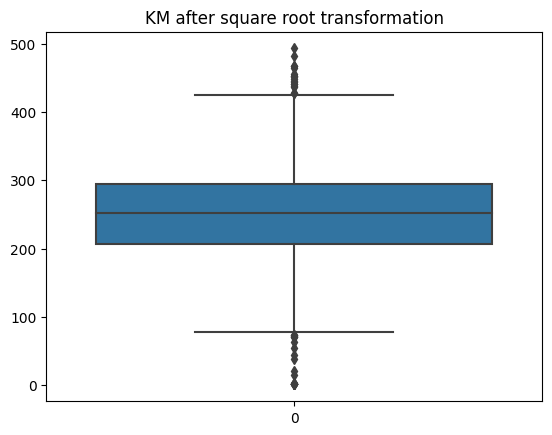

In [ ]:
sns.boxplot(np.sqrt(data.KM))
plt.title('KM after square root transformation')

Text(0.5, 1.0, 'HP')

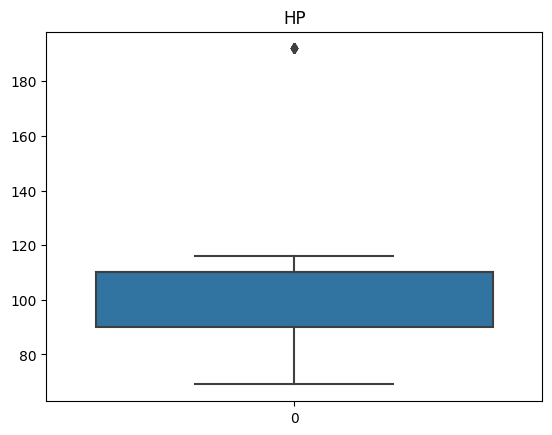

In [ ]:
sns.boxplot(data.HP)
plt.title('HP')

Text(0.5, 1.0, 'HP after log transformation')

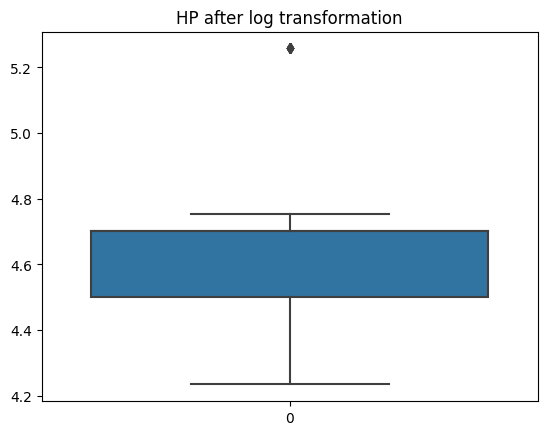

In [ ]:
sns.boxplot(np.log(data.HP))
plt.title('HP after log transformation')

Text(0.5, 1.0, 'Doors')

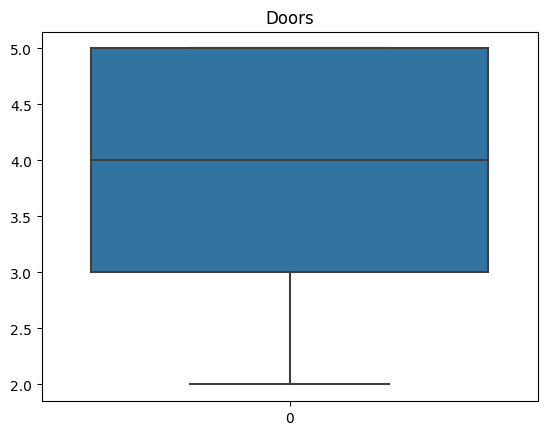

In [ ]:
sns.boxplot(data.Doors)
plt.title('Doors')

Text(0.5, 1.0, 'Gears')

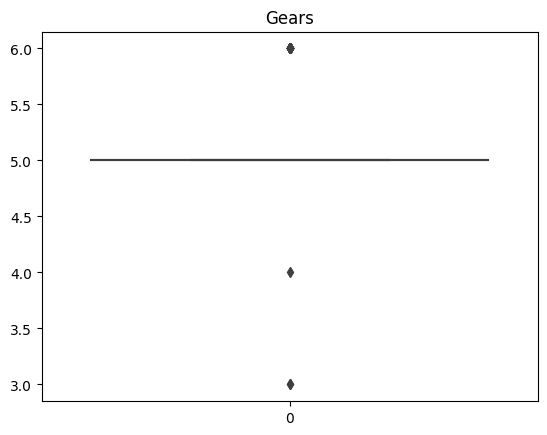

In [ ]:
sns.boxplot(data.Gears)
plt.title('Gears')

Text(0.5, 1.0, 'QTax')

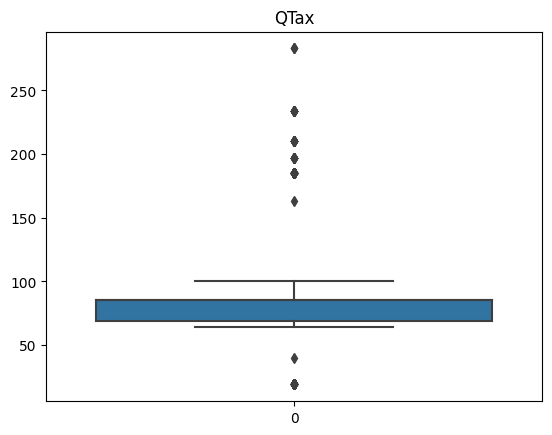

In [ ]:
sns.boxplot(data.Qtax)
plt.title('QTax')

Text(0.5, 1.0, 'QTax after sqrt transformation')

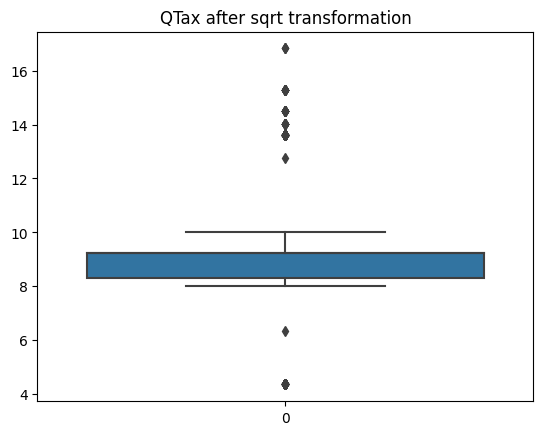

In [ ]:
sns.boxplot(np.sqrt(data.Qtax))
plt.title('QTax after sqrt transformation')

Text(0.5, 1.0, 'QTax after log transformation')

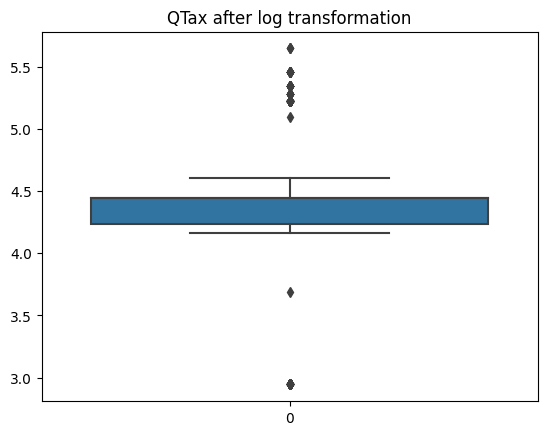

In [ ]:
sns.boxplot(np.log(data.Qtax))
plt.title('QTax after log transformation')

Text(0.5, 1.0, 'Weight')

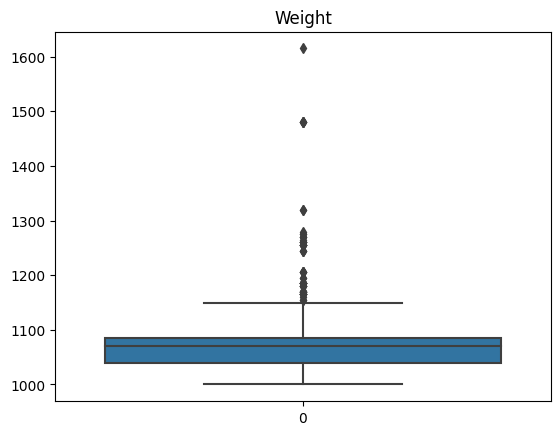

In [ ]:
sns.boxplot(data.Weight)
plt.title('Weight')

Text(0.5, 1.0, 'Weight log after transformation')

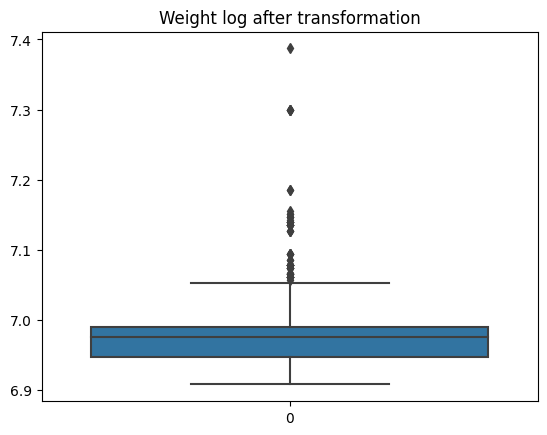

In [ ]:
sns.boxplot(np.log(data.Weight))
plt.title('Weight log after transformation')

There are outliers in the data even after transformations

## Correlation

In [ ]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Qtax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


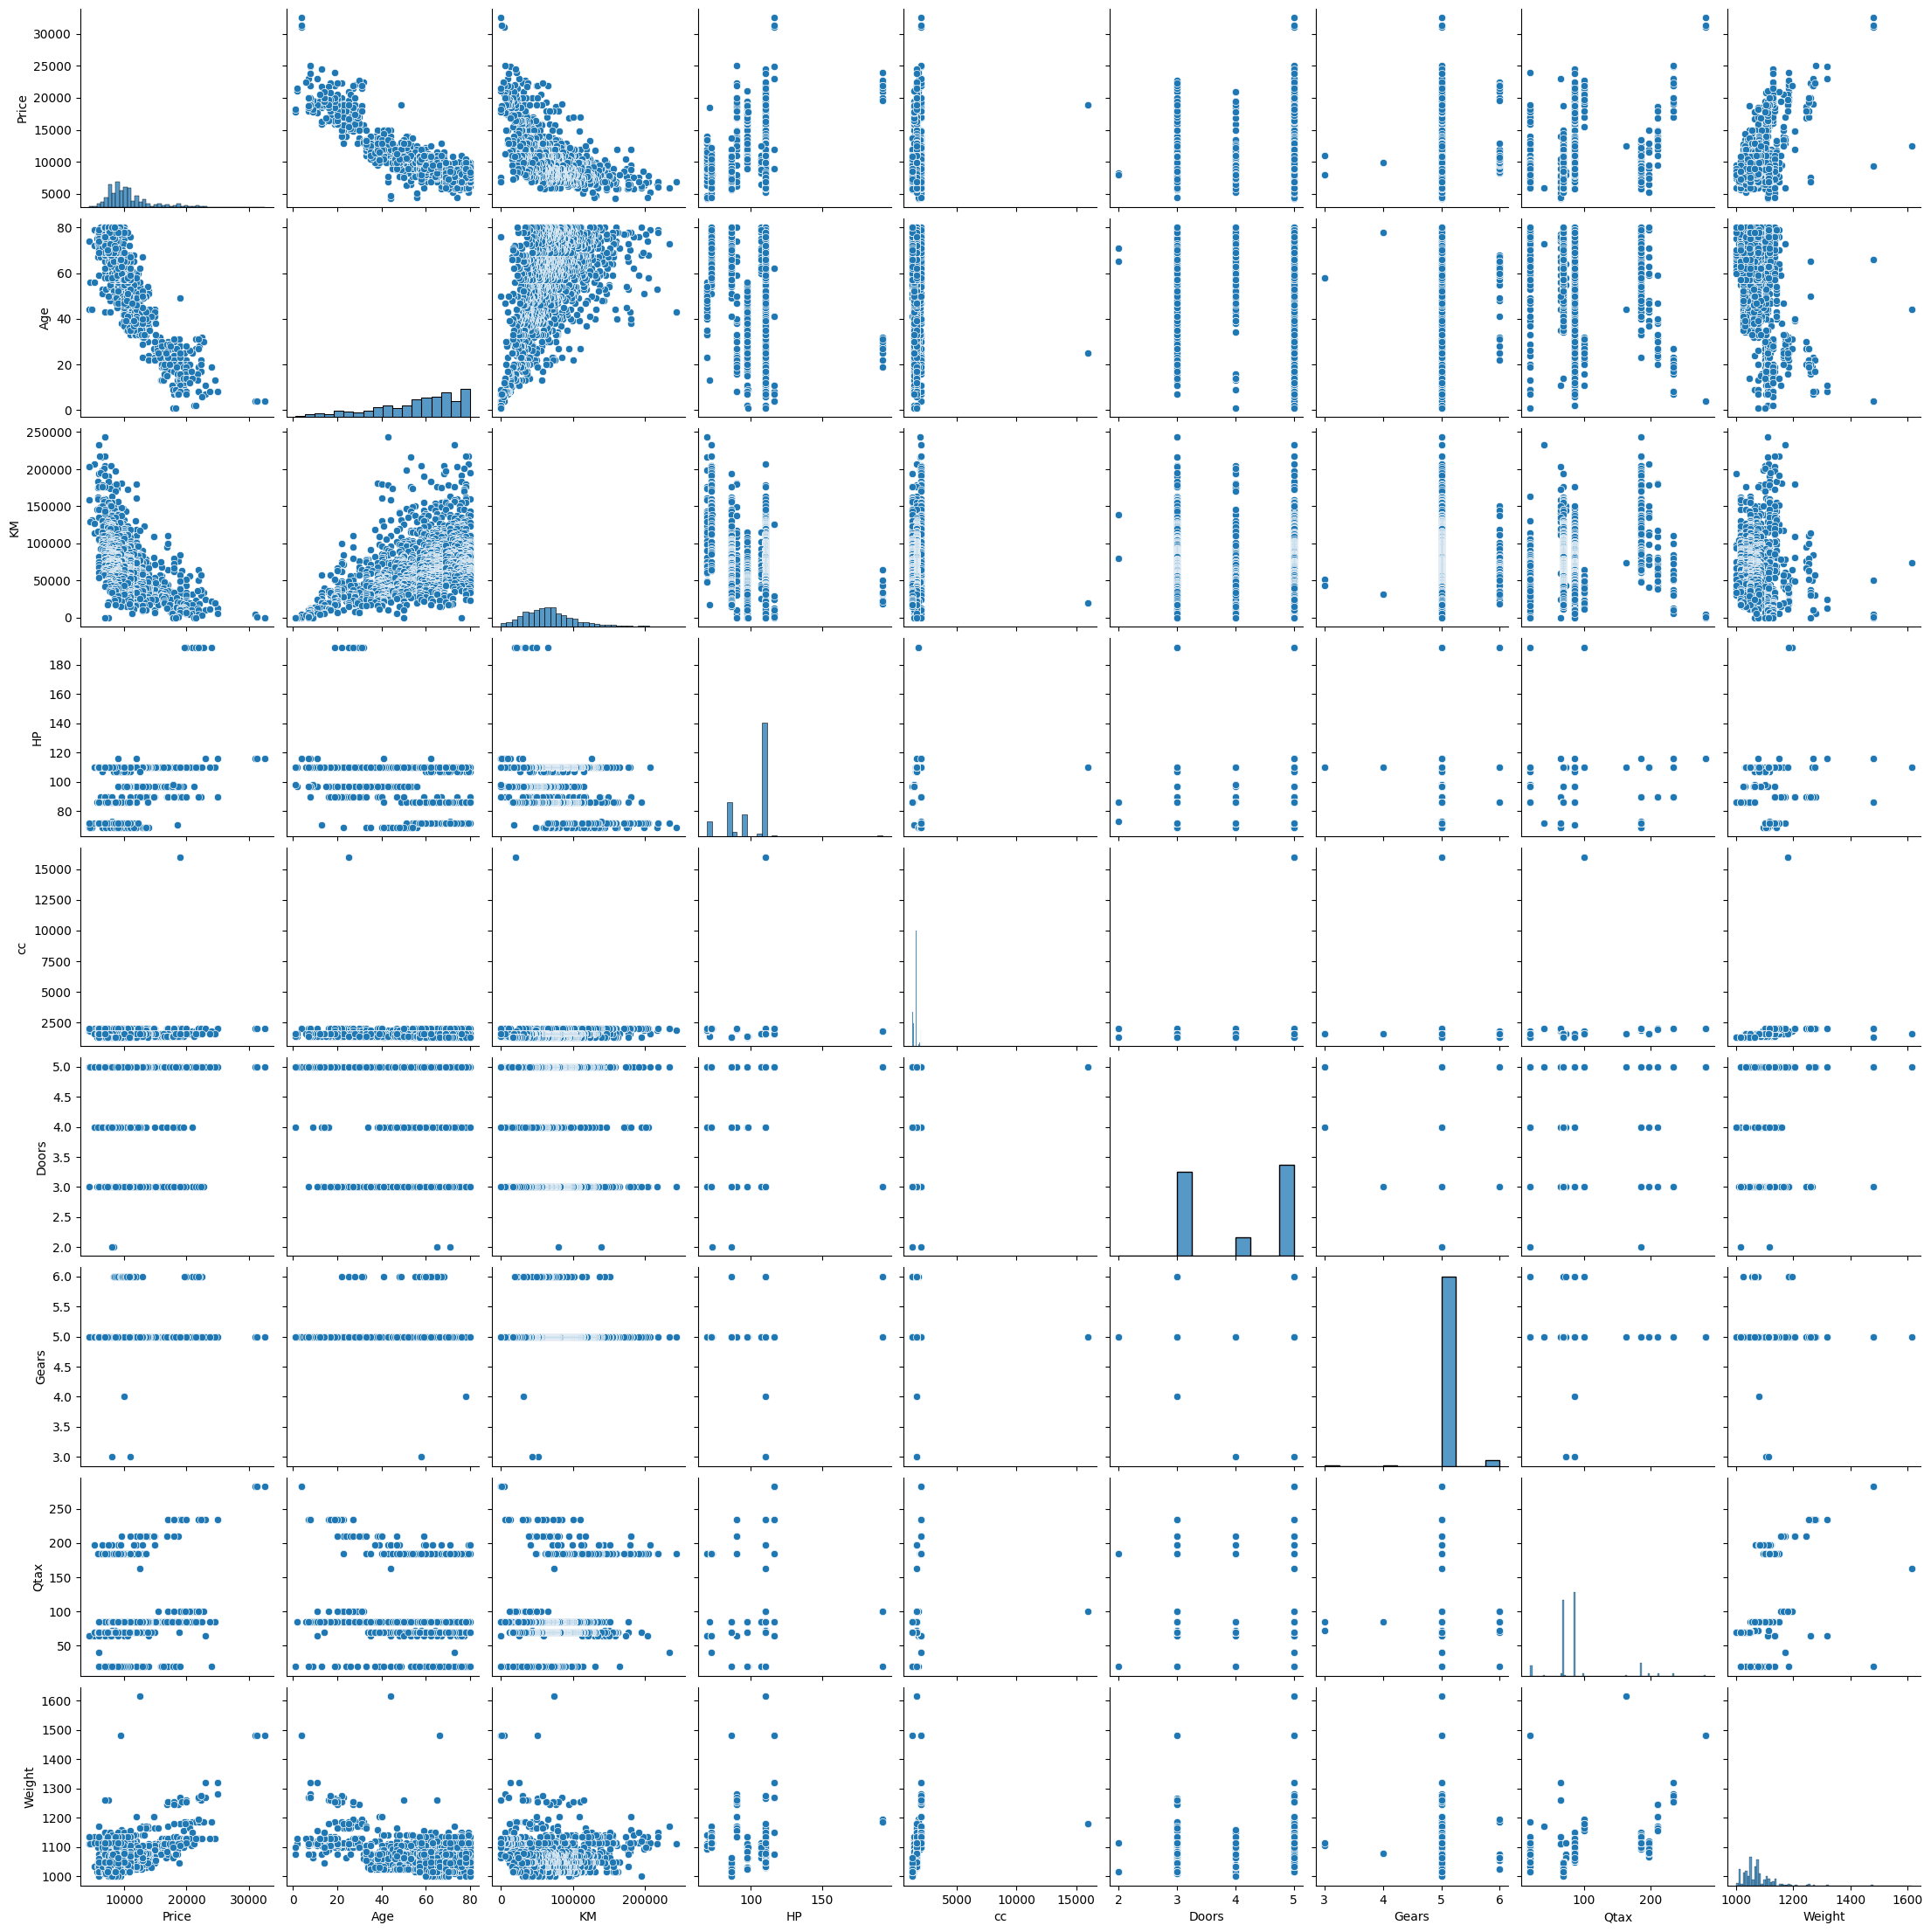

In [ ]:
sns.pairplot(data)

<Axes: >

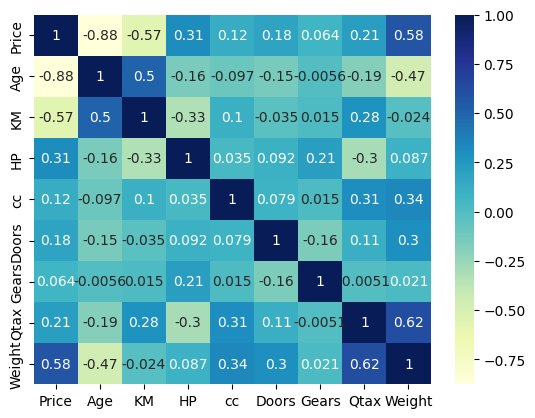

In [ ]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

Gears column has very less corretion with the Price column

## Building a model

In [ ]:
model=smf.ols('Price ~ Age+KM+HP+cc+Doors+Gears+Qtax+Weight',data=data).fit()
model.rsquared

0.8960864004304144

In [ ]:
transformed=smf.ols('np.log(Price) ~ np.square(Age)+KM+HP+cc+Doors+Gears+Qtax+Weight',data=data).fit()
transformed.rsquared

0.861765738921467

Since the model without transformation has more rsquared than the model with transformation we shall continue with the model without transformation.

In [ ]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
Qtax            3.858805
Weight         16.855470
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        08:59:57   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Qtax           3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Building linear model for cc and Doors as its p-value is grater than 0.05

In [ ]:
sm_cc=smf.ols('Price ~ cc',data=data).fit()
sm_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 22 May 2023   Prob (F-statistic):           2.29e-06
Time:                        08:59:57   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sm_doors=smf.ols('Price ~ Doors',data=data).fit()
sm_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 22 May 2023   Prob (F-statistic):           2.40e-12
Time:                        08:59:57   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Creating the model using both the features to check their effect on the model

In [ ]:
sm_cd=smf.ols('Price ~ cc+Doors',data=data).fit()
sm_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 22 May 2023   Prob (F-statistic):           2.55e-15
Time:                        08:59:58   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Qtax', 'Weight'], dtype='object')

### VIF calculation

In [ ]:
rsq_a=smf.ols('Age ~ KM+HP+cc+Doors+Qtax+Gears+Weight',data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_k=smf.ols('KM ~ Age+HP+cc+Doors+Qtax+Gears+Weight',data=data).fit().rsquared
vif_k=1/(1-rsq_k)

rsq_h=smf.ols('HP ~ KM+Age+cc+Doors+Qtax+Gears+Weight',data=data).fit().rsquared
vif_h=1/(1-rsq_h)

rsq_c=smf.ols('cc ~ Age+KM+HP+Doors+Qtax+Gears+Weight',data=data).fit().rsquared
vif_c=1/(1-rsq_c)

rsq_d=smf.ols('Doors ~ Age+KM+HP+cc+Qtax+Gears+Weight',data=data).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_q=smf.ols('Qtax ~ Age+KM+HP+cc+Doors+Gears+Weight',data=data).fit().rsquared
vif_q=1/(1-rsq_q)

rsq_g=smf.ols('Gears ~ Age+KM+HP+cc+Doors+Qtax+Weight',data=data).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_w=smf.ols('Weight ~ Age+KM+HP+cc+Doors+Qtax+Gears',data=data).fit().rsquared
vif_w=1/(1-rsq_w)

VIF_table=pd.DataFrame({'Vaiables':['Age','KM','HP','cc','Doors','Qtax','Gears','Weight'],"VIF_Values":[vif_a,vif_k,vif_h,vif_c,vif_d,vif_q,vif_q,vif_g]})
VIF_table

,Vaiables,VIF_Values
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Qtax,2.295375
6,Gears,2.295375
7,Weight,1.098843


VIF of all the variables are less than 20 hence they are independent of each other

### Model Validation

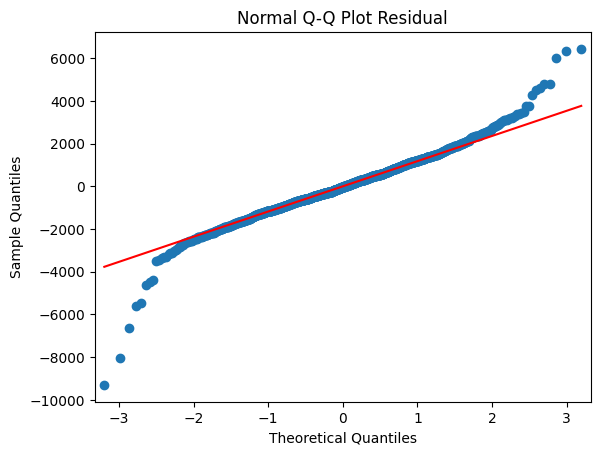

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot Residual")
plt.show()

### Residual vs Regressors 

eval_env: 1


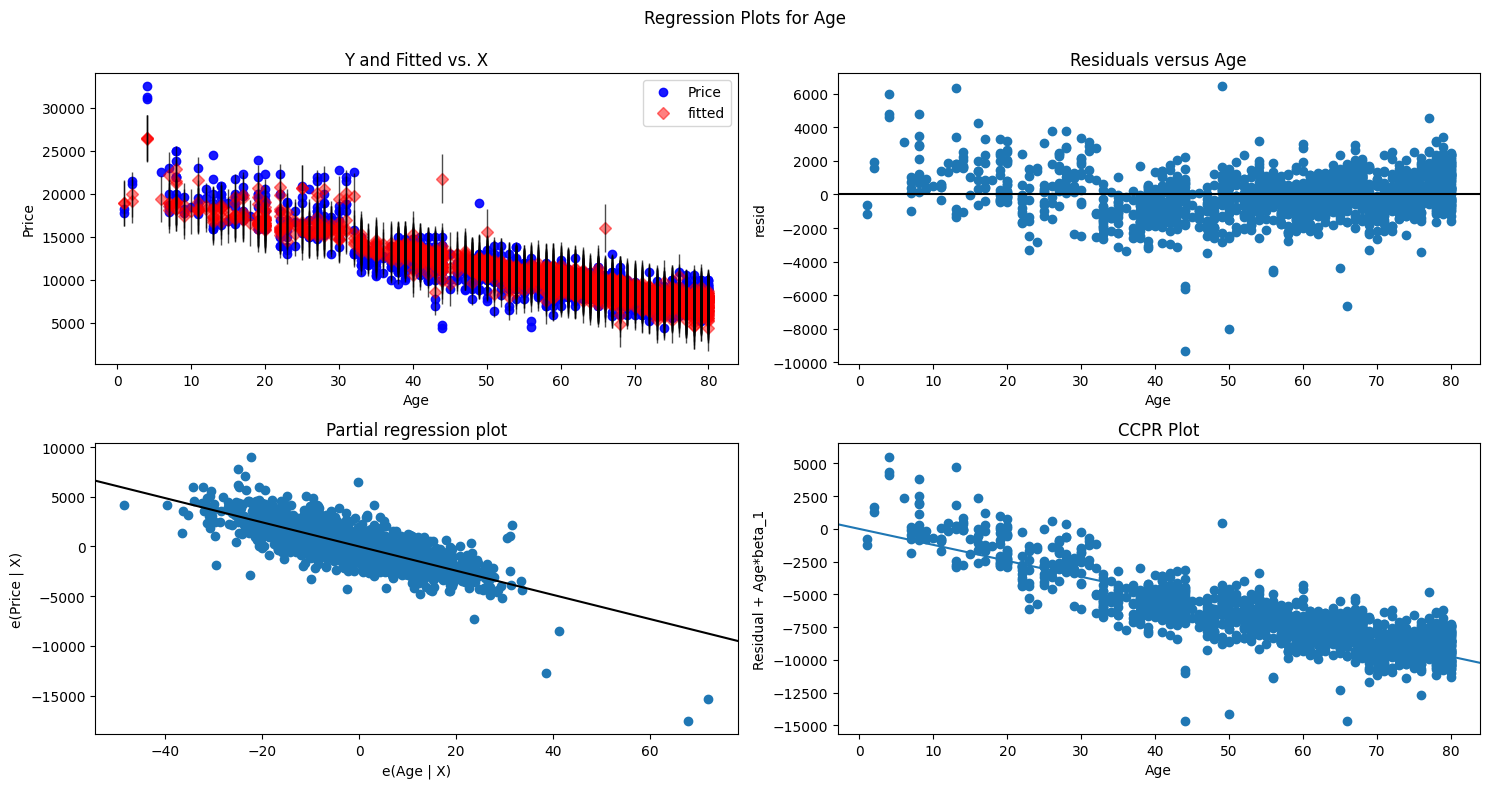

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


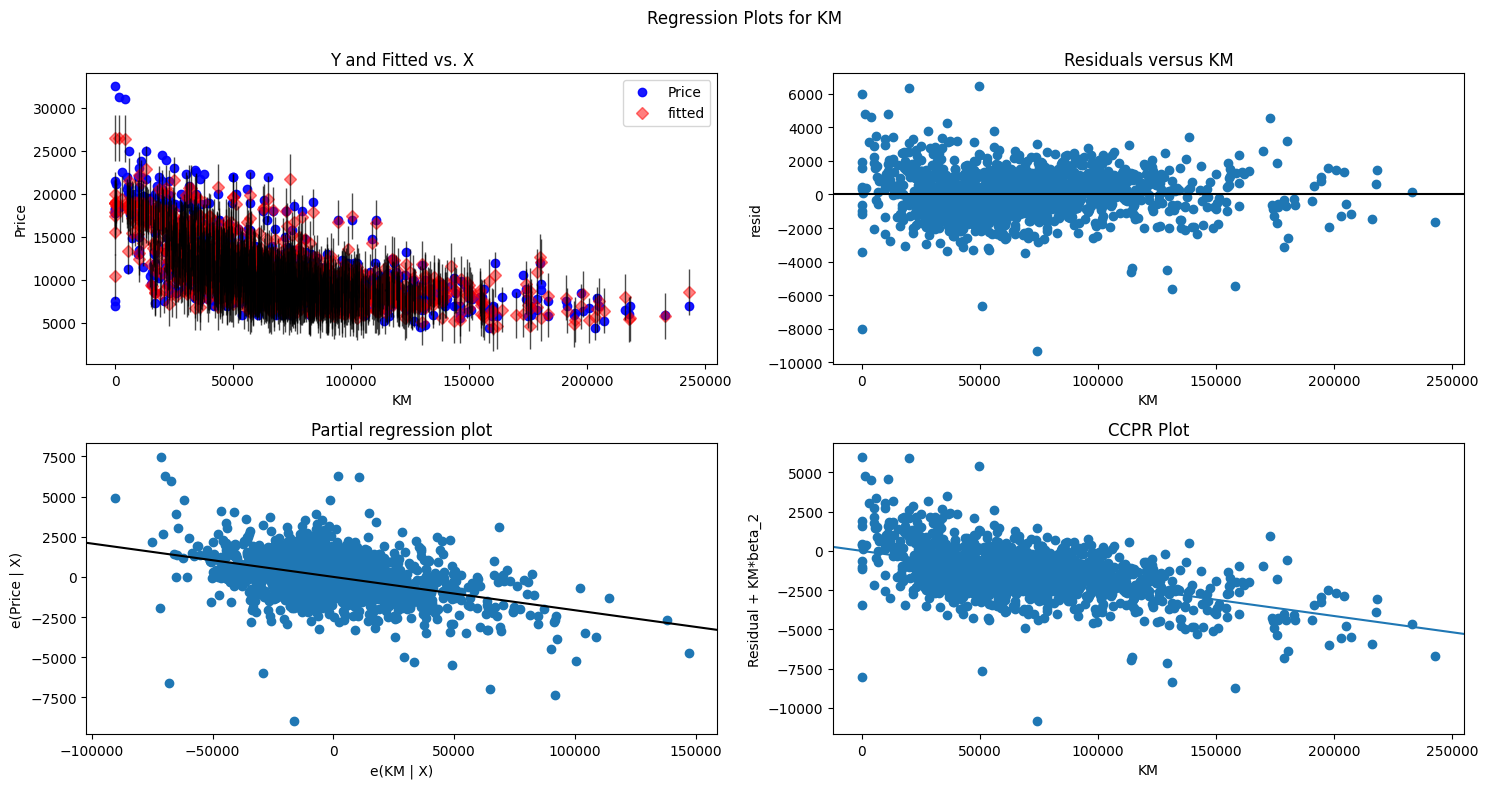

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


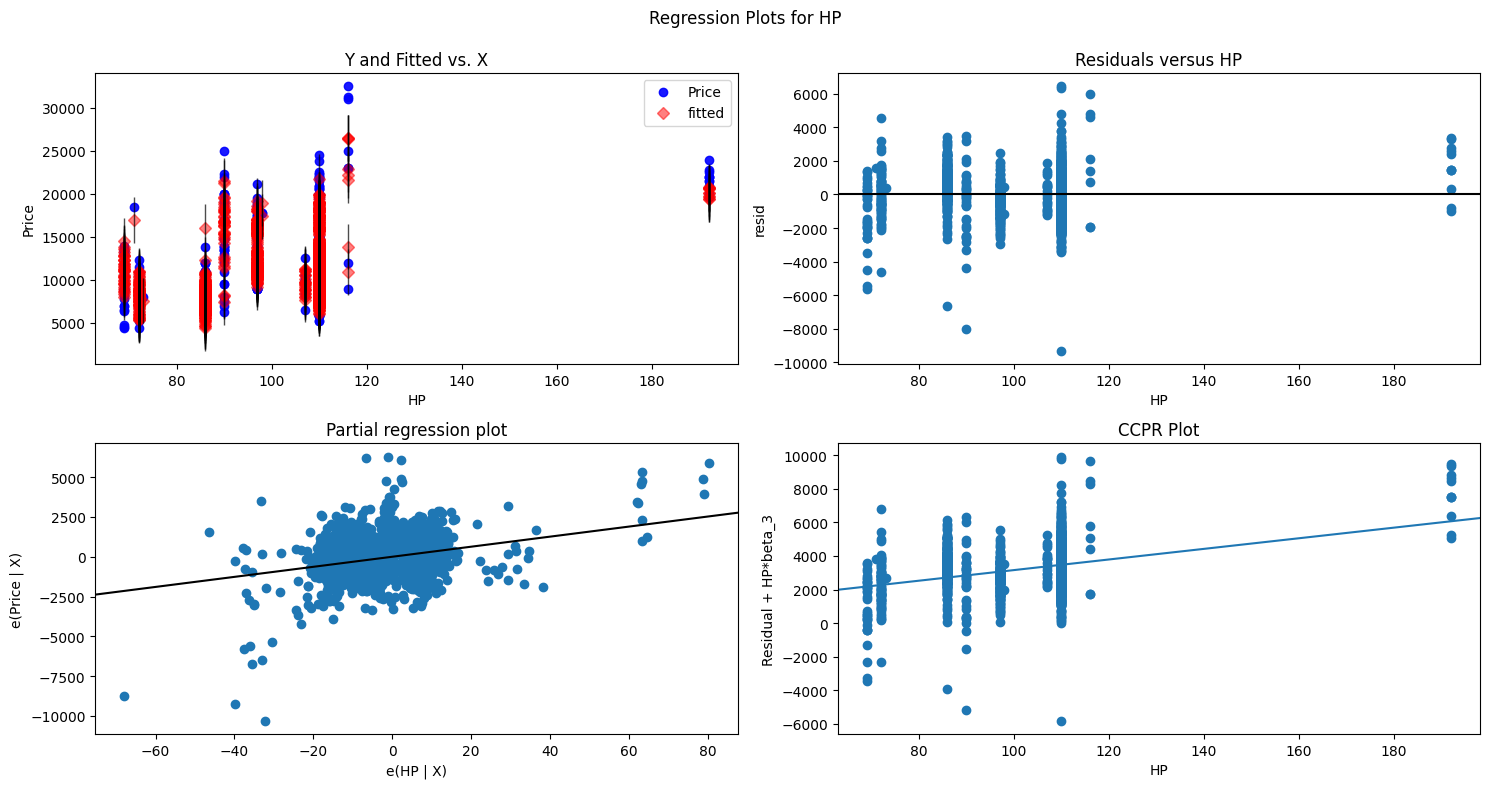

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


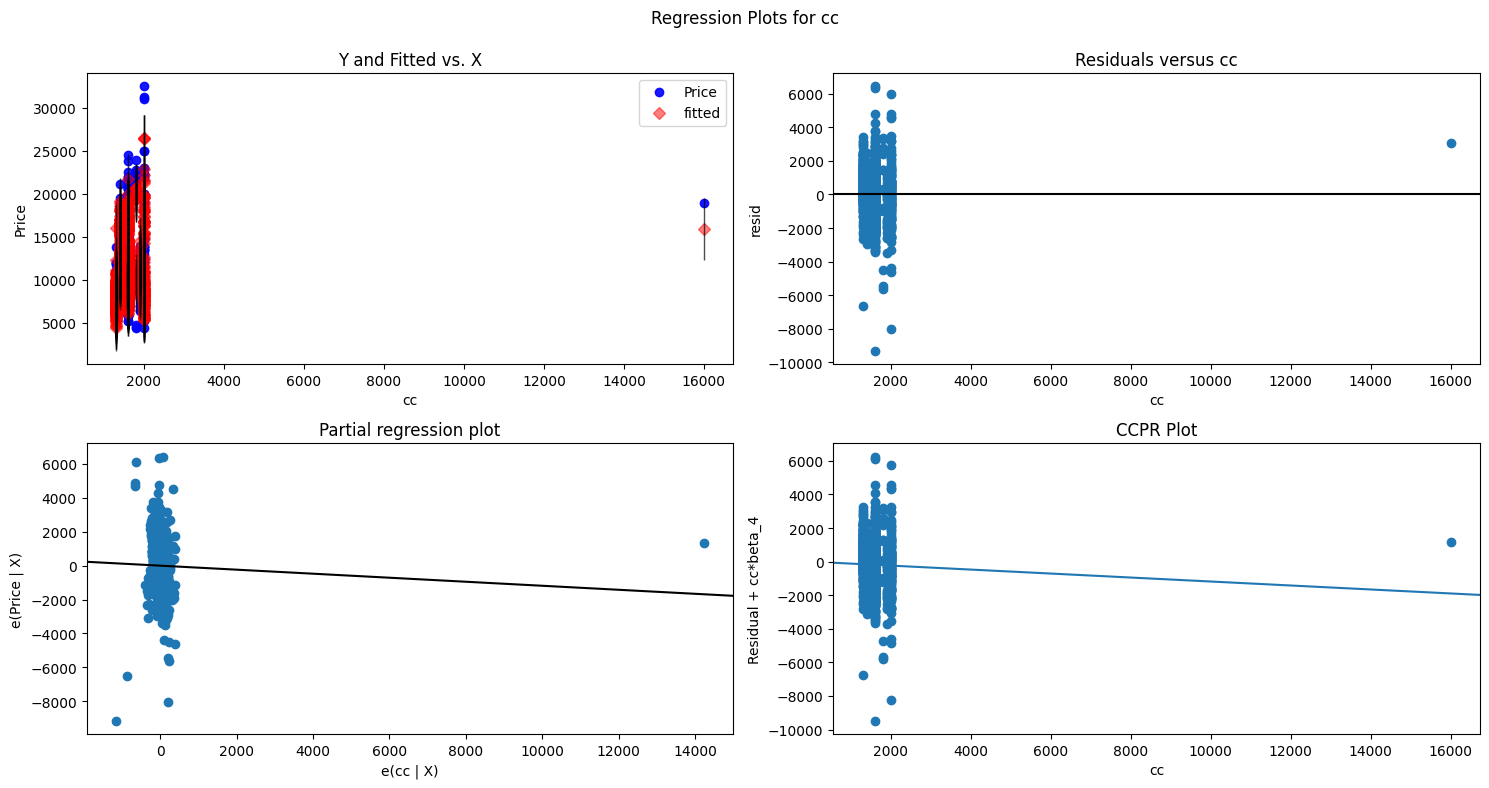

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()


eval_env: 1


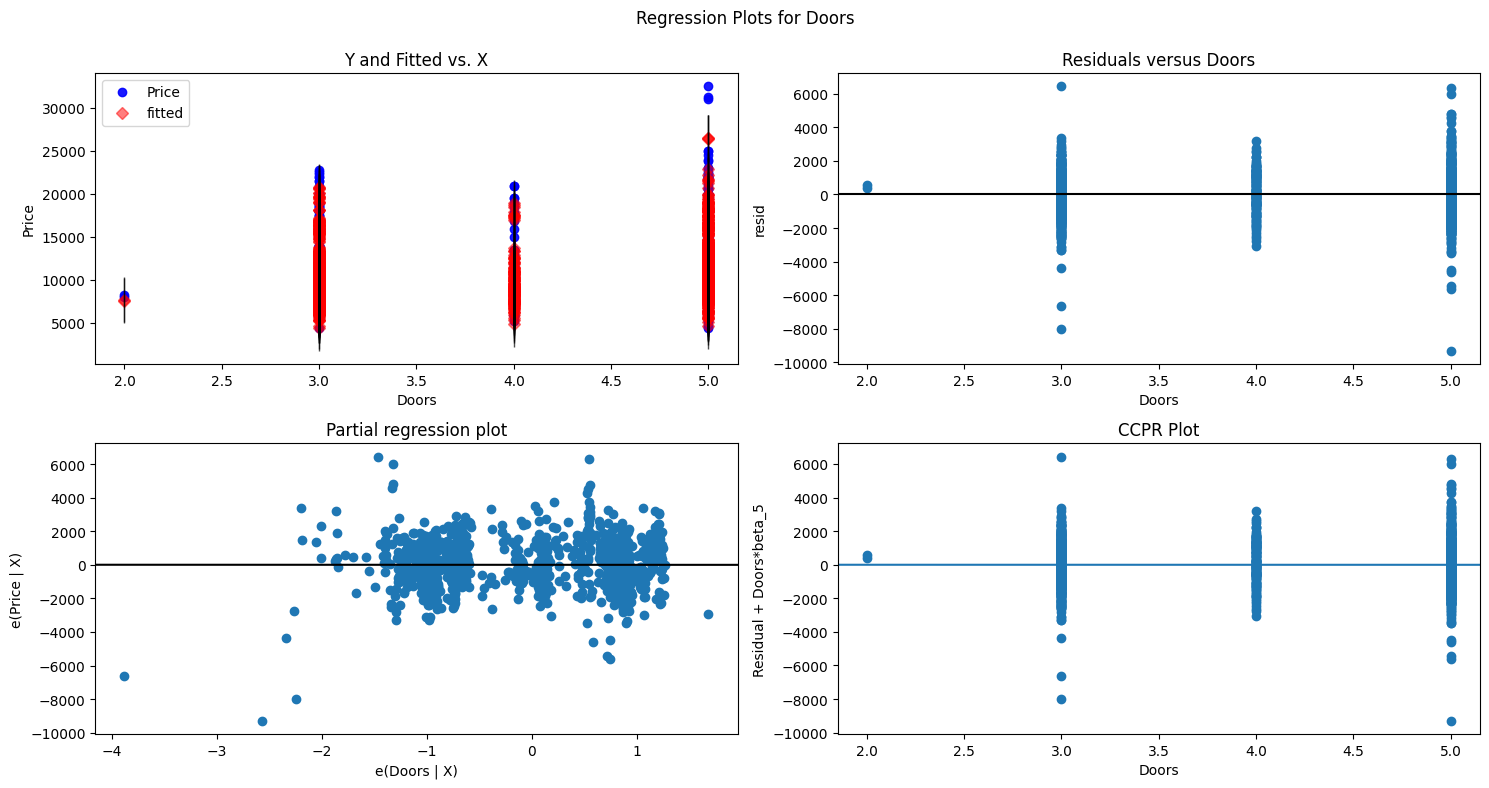

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


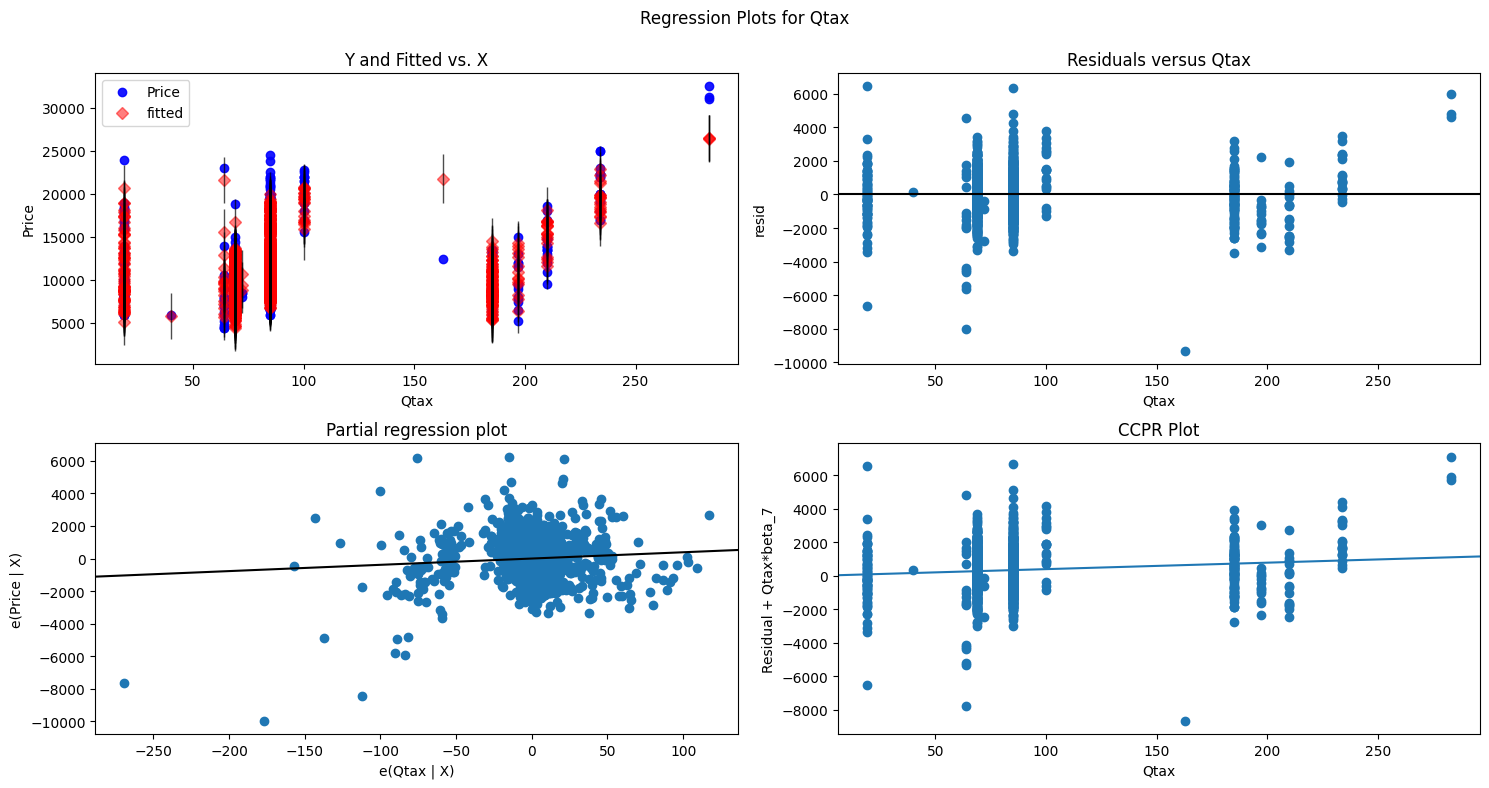

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Qtax',fig=fig)
plt.show()

eval_env: 1


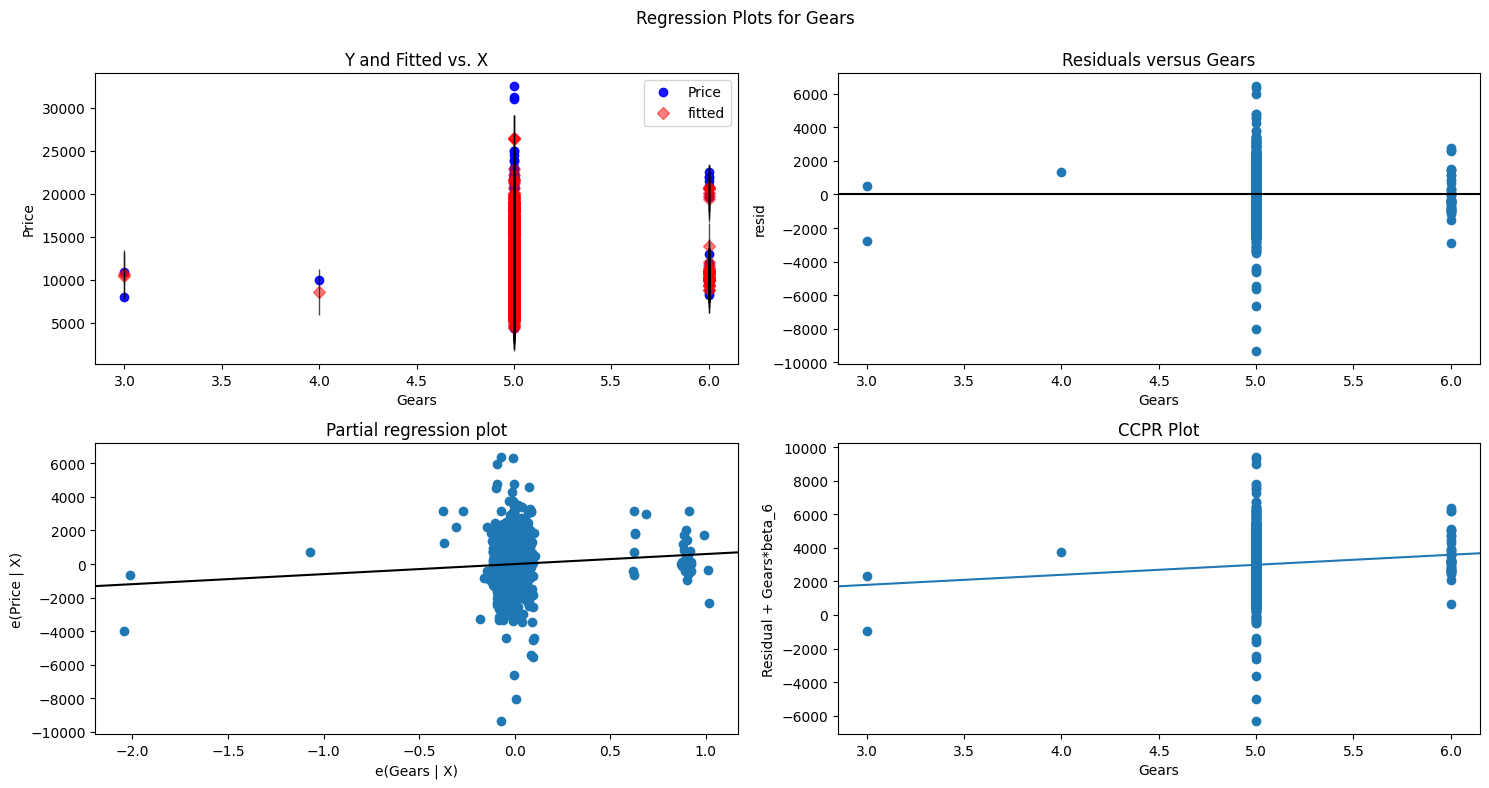

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


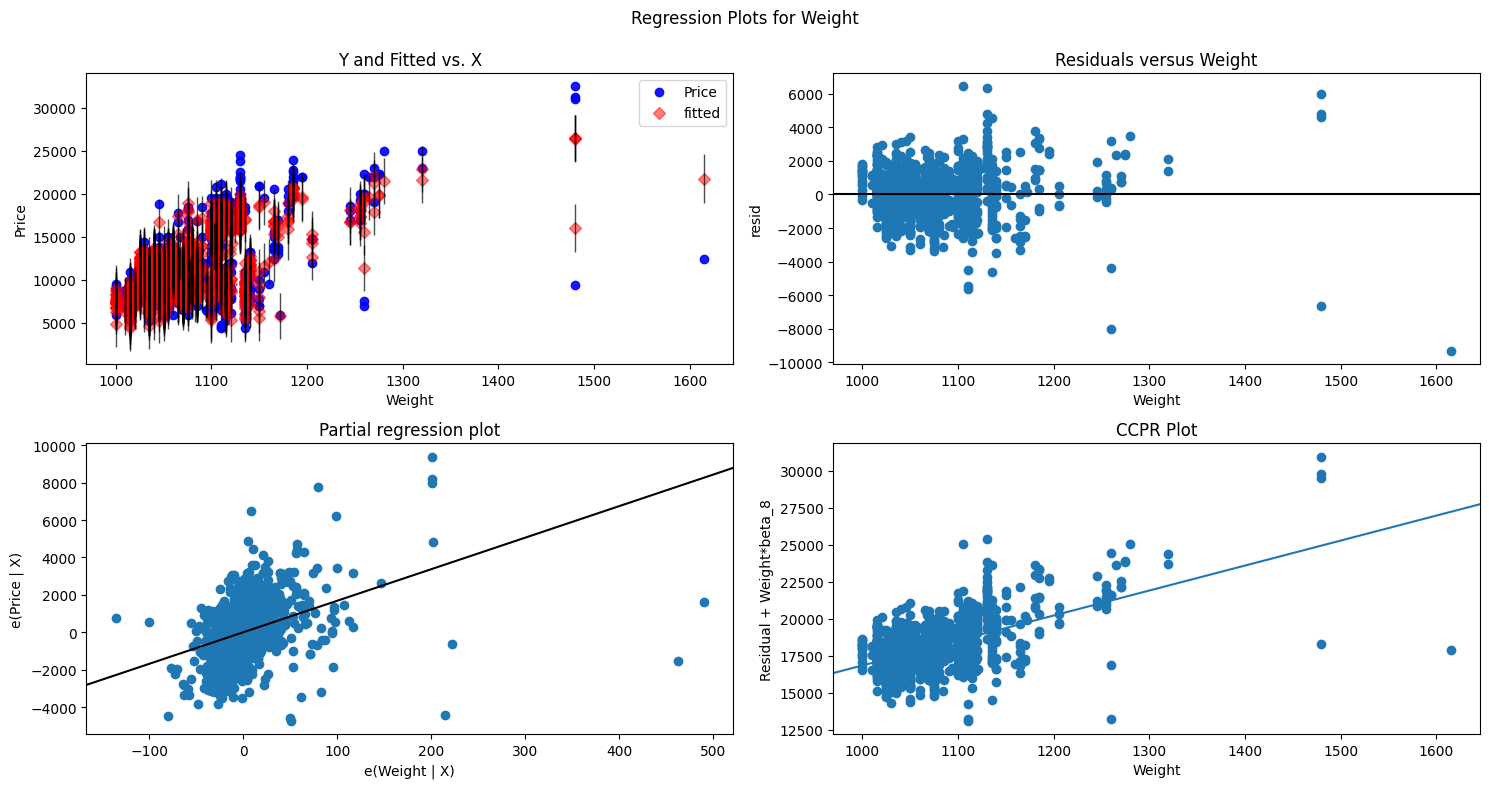

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

### Model Deletion Diagnostic

### Detecting of outliers Cook's Distance

In [ ]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

In [ ]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Qtax+Weight',data=data).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data=data.drop(data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data
else:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Qtax+Weight',data=data).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8960864004304144


In [ ]:
data

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1410,8450,80,23000,86,1300,3,5,69,1015
1411,7500,69,20544,86,1300,3,5,69,1025
1412,10845,72,19000,86,1300,3,5,69,1015
1413,8500,71,17016,86,1300,3,5,69,1015


In [ ]:
data.shape

(1415, 9)

In [ ]:
final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Qtax+Weight',data=data).fit()

In [ ]:
(c1,_)=final_model.get_influence().cooks_distance

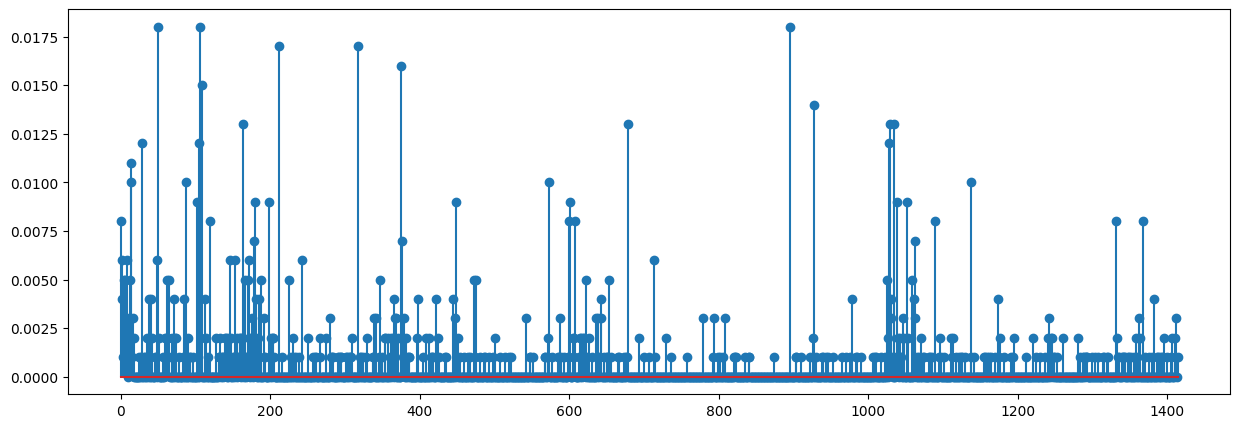

In [ ]:
f=plt.figure(figsize=(15,5))
y1=[0.02,0.02]
plt.stem(np.arange(len(data)),np.round(c1,3))
plt.show()

Calculating Leverage cutt-off value

In [ ]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.021201413427561835

In [ ]:
np.argmax(c1),np.max(c1)

(50, 0.0183859926640669)

The max c-value is less than the leverage cutt-off value

### Final Model

In [ ]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1516.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        09:12:20   Log-Likelihood:                -11943.
No. Observations:                1415   AIC:                         2.390e+04
Df Residuals:                    1406   BIC:                         2.395e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.554e+04   1406.110    -11.052      0.000   -1.83e+04   -1.28e+04
Age         -110.2678      2.318    -47.575      0.000    -114.815    -105.721
KM            -0.0173      0.001    -15.480      0.000      -0.020      -0.015
HP            27.2014      2.747      9.901      0.000      21.812      32.591
cc            -3.3100      0.286    -11.570      0.000      -3.871      -2.749
Doors       -137.6080     34.940     -3.938      0.000    -206.149     -69.067
Gears        312.7510    175.681      1.780      0.075     -31.873     657.375
Qtax           1.0316      1.357      0.760      0.447      -1.630       3.693
Weight        32.6162      1.277     25.538      0.000      30.111      35.122
==============================================================================
Omnibus:                       20.694   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.015
Skew:                           0.212   Prob(JB):                     3.70e-06
Kurtosis:                       3.494   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data['Predicted_values']=np.round(final_model.fittedvalues,2)
data['Errors']=np.round(final_model.resid,2)
data

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,Weight,Predicted_values,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16302.66,-2802.66
1,13750,23,72937,90,2000,3,5,210,1165,15853.15,-2103.15
2,13950,24,41711,90,2000,3,5,210,1165,16283.77,-2333.77
3,14950,26,48000,90,2000,3,5,210,1165,15954.30,-1004.30
4,13750,30,38500,90,2000,3,5,210,1170,15840.86,-2090.86
...,...,...,...,...,...,...,...,...,...,...,...
1410,8450,80,23000,86,1300,3,5,69,1015,7603.16,846.84
1411,7500,69,20544,86,1300,3,5,69,1025,9184.81,-1684.81
1412,10845,72,19000,86,1300,3,5,69,1015,8554.59,2290.41
1413,8500,71,17016,86,1300,3,5,69,1015,8699.22,-199.22
